# Frequency-Shift Keying (FSK)

This notebook demonstrates frequency-shift keying (FSK) modulation and demodulation using the `sdr` library.

FSK is a non-linear frequency modulation scheme that encodes information by modulating the frequency of a carrier sinusoid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sdr

# Set random seed for reproducibility
np.random.seed(42)

## Binary FSK (BFSK)

Let's start with binary FSK, the simplest form of FSK modulation.

In [2]:
# Create a BFSK modulator
bfsk = sdr.FSK(2, freq_sep=1000, sps=8)
print(f"BFSK modulator: {bfsk}")
print(f"Frequency mapping: {bfsk.freq_map} Hz")

BFSK modulator: sdr.FSK:
  order: 2
  bps: 1
  freq_sep: 1000 Hz
  sps: 8
  pulse_shape: (8,) shape
  symbol_labels: gray
Frequency mapping: [-500.  500.] Hz


In [3]:
# Generate random binary symbols
symbols = np.array([0, 1, 1, 0, 1, 0, 0, 1])
print(f"Input symbols: {symbols}")

# Modulate the symbols
tx_signal = bfsk.modulate(symbols)
print(f"Transmitted signal length: {len(tx_signal)} samples")

Input symbols: [0 1 1 0 1 0 0 1]
Transmitted signal length: 64 samples


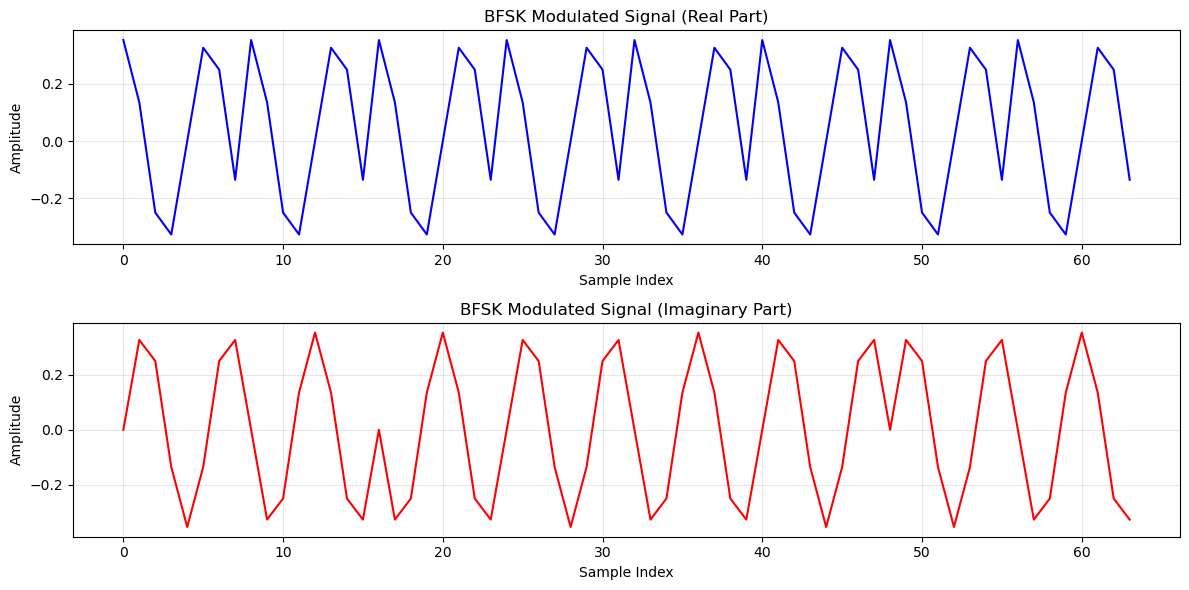

In [4]:
# Plot the transmitted signal
t = np.arange(len(tx_signal))
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, np.real(tx_signal), 'b-', linewidth=1.5)
plt.title('BFSK Modulated Signal (Real Part)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(t, np.imag(tx_signal), 'r-', linewidth=1.5)
plt.title('BFSK Modulated Signal (Imaginary Part)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# Demodulate the signal
rx_symbols = bfsk.demodulate(tx_signal)
print(f"Received symbols: {rx_symbols}")
print(f"Symbol errors: {np.sum(symbols != rx_symbols)} out of {len(symbols)}")

Received symbols: [0 1 1 0 1 0 0 1]
Symbol errors: 0 out of 8


## 4-FSK Modulation

Now let's examine 4-FSK, which can transmit 2 bits per symbol.

In [6]:
# Create a 4-FSK modulator
fsk4 = sdr.FSK(4, freq_sep=500, sps=8)
print(f"4-FSK modulator: {fsk4}")
print(f"Frequency mapping: {fsk4.freq_map} Hz")
print(f"Symbol mapping: {fsk4.symbol_map}")

4-FSK modulator: sdr.FSK:
  order: 4
  bps: 2
  freq_sep: 500 Hz
  sps: 8
  pulse_shape: (8,) shape
  symbol_labels: gray
Frequency mapping: [-750. -250.  250.  750.] Hz
Symbol mapping: [0 1 3 2]


In [7]:
# Generate random 4-ary symbols
symbols_4 = np.array([0, 1, 2, 3, 2, 1, 0, 3])
print(f"Input symbols: {symbols_4}")

# Modulate and demodulate
tx_signal_4 = fsk4.modulate(symbols_4)
rx_symbols_4 = fsk4.demodulate(tx_signal_4)

print(f"Received symbols: {rx_symbols_4}")
print(f"Symbol errors: {np.sum(symbols_4 != rx_symbols_4)} out of {len(symbols_4)}")

Input symbols: [0 1 2 3 2 1 0 3]
Received symbols: [0 1 2 3 2 1 0 3]
Symbol errors: 0 out of 8


## Performance Analysis: BER vs Eb/N0

Let's analyze the theoretical bit error rate (BER) performance of different FSK schemes.

In [8]:
# Define Eb/N0 range
ebn0_db = np.arange(0, 12, 0.5)

# Create different FSK modulators
bfsk = sdr.FSK(2, freq_sep=1000)
fsk4 = sdr.FSK(4, freq_sep=500)
fsk8 = sdr.FSK(8, freq_sep=250)

# Calculate theoretical BER
ber_bfsk = bfsk.ber(ebn0_db)
ber_4fsk = fsk4.ber(ebn0_db)
ber_8fsk = fsk8.ber(ebn0_db)

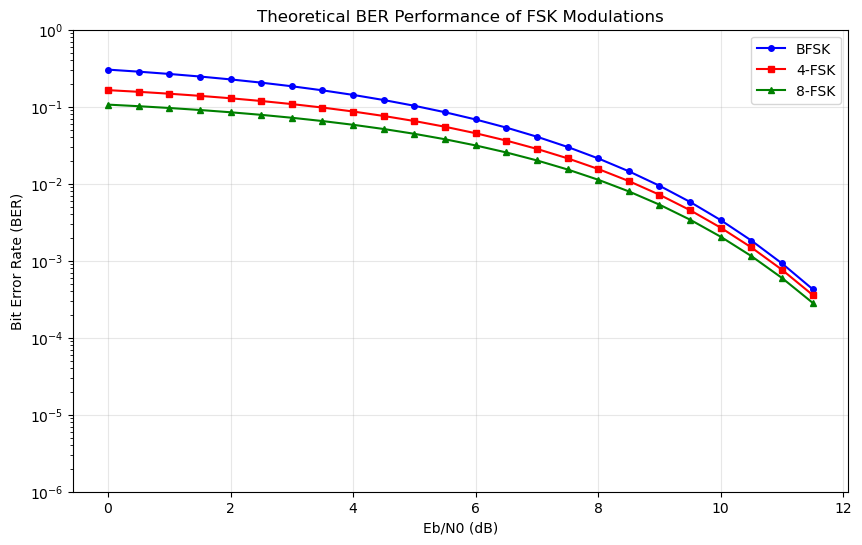

In [9]:
# Plot BER curves
plt.figure(figsize=(10, 6))
plt.semilogy(ebn0_db, ber_bfsk, 'b-o', label='BFSK', markersize=4)
plt.semilogy(ebn0_db, ber_4fsk, 'r-s', label='4-FSK', markersize=4)
plt.semilogy(ebn0_db, ber_8fsk, 'g-^', label='8-FSK', markersize=4)

plt.grid(True, alpha=0.3)
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Theoretical BER Performance of FSK Modulations')
plt.legend()
plt.ylim([1e-6, 1e0])
plt.show()

## Symbol Error Rate (SER) Analysis

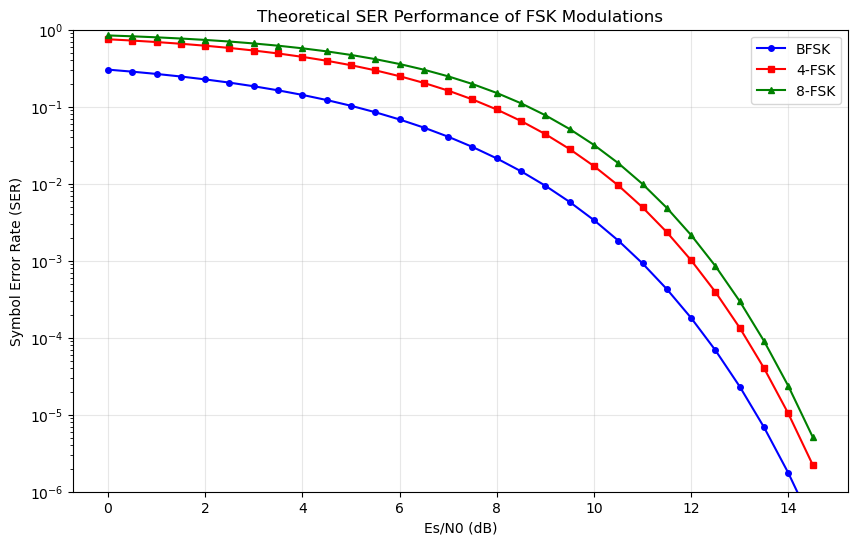

In [10]:
# Define Es/N0 range for SER analysis
esn0_db = np.arange(0, 15, 0.5)

# Calculate theoretical SER
ser_bfsk = bfsk.ser(esn0_db)
ser_4fsk = fsk4.ser(esn0_db)
ser_8fsk = fsk8.ser(esn0_db)

# Plot SER curves
plt.figure(figsize=(10, 6))
plt.semilogy(esn0_db, ser_bfsk, 'b-o', label='BFSK', markersize=4)
plt.semilogy(esn0_db, ser_4fsk, 'r-s', label='4-FSK', markersize=4)
plt.semilogy(esn0_db, ser_8fsk, 'g-^', label='8-FSK', markersize=4)

plt.grid(True, alpha=0.3)
plt.xlabel('Es/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Theoretical SER Performance of FSK Modulations')
plt.legend()
plt.ylim([1e-6, 1e0])
plt.show()

## Frequency Domain Analysis

Let's examine the frequency domain characteristics of FSK signals.

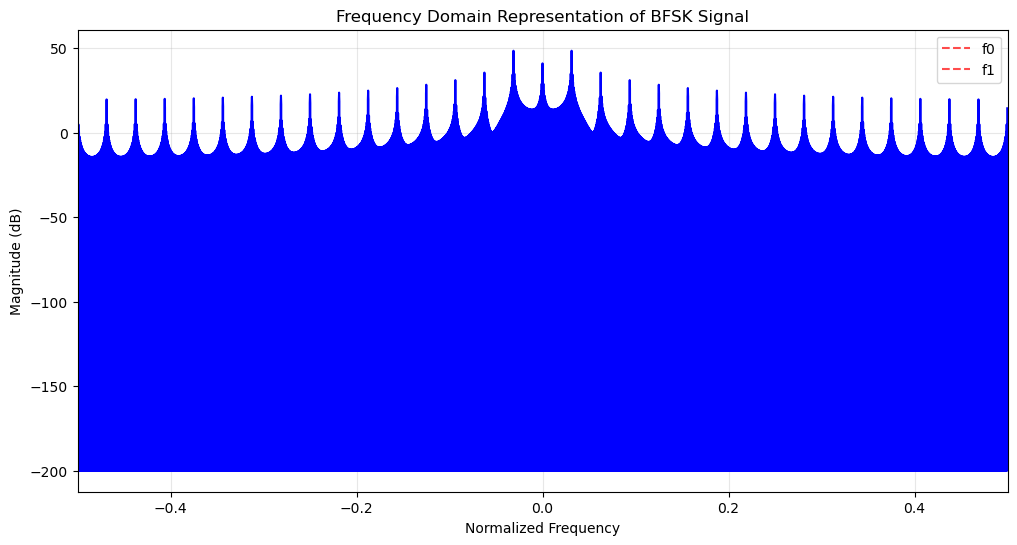

In [11]:
# Create a longer test signal for frequency analysis
bfsk_test = sdr.FSK(2, freq_sep=2000, sps=32)
test_symbols = np.array([0] * 50 + [1] * 50)  # 50 zeros followed by 50 ones
test_signal = bfsk_test.modulate(test_symbols)

# Compute FFT
fft_signal = np.fft.fft(test_signal)
fft_freq = np.fft.fftfreq(len(test_signal), d=1/bfsk_test.sps)
fft_freq_shifted = np.fft.fftshift(fft_freq)
fft_magnitude = np.fft.fftshift(np.abs(fft_signal))

# Normalize frequency to sample rate
freq_normalized = fft_freq_shifted / bfsk_test.sps

plt.figure(figsize=(12, 6))
plt.plot(freq_normalized, 20*np.log10(fft_magnitude + 1e-10), 'b-', linewidth=1.5)
plt.axvline(bfsk_test.freq_map[0]/bfsk_test.sps, color='red', linestyle='--', alpha=0.7, label='f0')
plt.axvline(bfsk_test.freq_map[1]/bfsk_test.sps, color='red', linestyle='--', alpha=0.7, label='f1')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Domain Representation of BFSK Signal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim([-0.5, 0.5])
plt.show()

## Performance with Noise

Let's test how FSK performs in the presence of additive white Gaussian noise (AWGN).

In [ ]:
# Monte Carlo simulation parameters
np.random.seed(42)  # For reproducible results
n_trials = 1000
n_symbols_per_trial = 1000  # Increased for better statistics
esn0_db = 8  # More reasonable Es/N0 for seeing errors

# Create FSK modulator
fsk_sim = sdr.FSK(4, freq_sep=1000, sps=8)

# Run simulation
errors = 0
total_symbols = 0

for trial in range(n_trials):
    # Generate random symbols
    symbols = np.random.randint(0, 4, n_symbols_per_trial)
    
    # Modulate
    tx_signal = fsk_sim.modulate(symbols)
    
    # Calculate noise power for specified Es/N0
    symbol_energy = np.mean(np.abs(tx_signal)**2) * fsk_sim.sps
    esn0_linear = 10**(esn0_db/10)
    noise_power = symbol_energy / esn0_linear
    
    # Add AWGN
    noise = np.sqrt(noise_power/2) * (np.random.randn(len(tx_signal)) + 1j*np.random.randn(len(tx_signal)))
    rx_signal = tx_signal + noise
    
    # Demodulate
    rx_symbols = fsk_sim.demodulate(rx_signal)
    
    # Count errors
    errors += np.sum(symbols != rx_symbols)
    total_symbols += len(symbols)

# Calculate empirical SER
empirical_ser = errors / total_symbols
print(f"Empirical SER at {esn0_db} dB Es/N0: {empirical_ser:.6f}")

# Compare with theoretical SER
theoretical_ser = fsk_sim.ser(esn0_db)
print(f"Theoretical SER at {esn0_db} dB Es/N0: {theoretical_ser:.6f}")
print(f"Relative error: {abs(empirical_ser - theoretical_ser) / theoretical_ser * 100:.1f}%")
print(f"Total symbols tested: {total_symbols:,}")
print(f"Expected errors: {theoretical_ser * total_symbols:.0f}, Actual errors: {errors}")

## Conclusion

This notebook demonstrated the key features of FSK modulation:

1. **Multi-level FSK**: Support for BFSK, 4-FSK, 8-FSK, and 16-FSK
2. **Non-coherent demodulation**: Energy detection for robust performance
3. **Theoretical performance**: Accurate BER and SER calculations
4. **Practical considerations**: Performance with noise and frequency domain analysis

FSK is particularly useful in applications where:
- Robust performance is needed in noisy environments
- Non-coherent detection is preferred (no carrier phase recovery required)
- Constant envelope modulation is desired (good for power amplifier efficiency)

The trade-offs include:
- Lower spectral efficiency compared to PSK
- Higher bandwidth requirements for the same data rate
- Performance degradation with increasing modulation order